# Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os

import pandas as pd
import scanpy

pd.options.display.max_columns = 50

def describe(df, random=False):
    print(df.shape)
    print("--- First 5 entries ---")
    display(df.head())
    if random:
        print('--- Random subset ---')
        display(df.sample(5))
        
data_folder = '/home/olga/data_lg/data_sm_copy/tabula-microcebus/data-objects/ss2-10x-combined'

In [3]:
gdrive_folder = '/home/olga/googledrive/TabulaMicrocebus/data/h5ad-objs/ss2-10x-combined/'
h5ad = os.path.join(gdrive_folder, "LCA_h5ad_complete_wRaw.h5ad")
lemur = scanpy.read(h5ad, cache=True)
lemur

AnnData object with n_obs × n_vars = 244081 × 31509
    obs: 'nCount_RNA', 'nFeature_RNA', 'cell_name_v0', 'cell_name', 'cell_barcode_10x', 'sequencing_run_10x', 'channel_10x_v0', 'channel_10x', 'batch_SS2', 'possibly_contaminated_barcode_10x', 'method', 'individual', 'tissue_v0', 'subtissue_v0', 'compartment_v0', 'cell_ontology_class_v0', 'free_annotation_v0', 'tissue__free_annotation_v0', 'tissue__cell_ontology_class_v0', 'tissue', 'subtissue', 'compartment_v1', 'cell_ontology_class_v1', 'free_annotation_v1', 'tissue__cell_ontology_class_v1', 'tissue__free_annotation_v1', 'tissue_system', 'tissue_order', 'dendrogram_group_name', 'dendrogram_group_color_name', 'dendrogram_group_color_hex', 'dendrogram_group_color_R', 'dendrogram_group_color_G', 'dendrogram_group_color_B', 'dendrogram_annotation', 'dendrogram_group_order', 'dendrogram_subgroup_name', 'dendrogram_subgroup_order', 'dendrogram_column_order', 'dendrogram_annotation_number', 'dendrogram_annotation_order', 'mix_hybrid', 'low

## Replace the `.X` matrix with the raw counts

In [4]:
lemur.X = lemur.layers['raw_counts'].astype(int)

## Subset to only 10x and make sure it's smaller

In [5]:
lemur_tenx = lemur[lemur.obs.cell_barcode_10x != 'nan']
lemur_tenx

View of AnnData object with n_obs × n_vars = 231752 × 31509
    obs: 'nCount_RNA', 'nFeature_RNA', 'cell_name_v0', 'cell_name', 'cell_barcode_10x', 'sequencing_run_10x', 'channel_10x_v0', 'channel_10x', 'batch_SS2', 'possibly_contaminated_barcode_10x', 'method', 'individual', 'tissue_v0', 'subtissue_v0', 'compartment_v0', 'cell_ontology_class_v0', 'free_annotation_v0', 'tissue__free_annotation_v0', 'tissue__cell_ontology_class_v0', 'tissue', 'subtissue', 'compartment_v1', 'cell_ontology_class_v1', 'free_annotation_v1', 'tissue__cell_ontology_class_v1', 'tissue__free_annotation_v1', 'tissue_system', 'tissue_order', 'dendrogram_group_name', 'dendrogram_group_color_name', 'dendrogram_group_color_hex', 'dendrogram_group_color_R', 'dendrogram_group_color_G', 'dendrogram_group_color_B', 'dendrogram_annotation', 'dendrogram_group_order', 'dendrogram_subgroup_name', 'dendrogram_subgroup_order', 'dendrogram_column_order', 'dendrogram_annotation_number', 'dendrogram_annotation_order', 'mix_hybri

### Double-check that it's raw integer count data

In [6]:
lemur_tenx[:5, :5].to_df()

,AU129-gt01,AU129-gr02,AU129-gt02,AU129-gr01,AU129-gt03
L4_Testes_10X_AAACCTGAGGTAAACT,0,4,0,10,0
L4_Testes_10X_AAACCTGAGTACGTAA,0,0,0,2,0
L4_Testes_10X_AAACCTGCAGTATGCT,0,13,0,17,0
L4_Testes_10X_AAACCTGGTATAATGG,0,1,0,9,0
L4_Testes_10X_AAACCTGGTGCCTGTG,0,7,0,29,0


### Double-check that it's raw integer count data

In [7]:
lemur_tenx[:5, :5].to_df()

,AU129-gt01,AU129-gr02,AU129-gt02,AU129-gr01,AU129-gt03
L4_Testes_10X_AAACCTGAGGTAAACT,0,4,0,10,0
L4_Testes_10X_AAACCTGAGTACGTAA,0,0,0,2,0
L4_Testes_10X_AAACCTGCAGTATGCT,0,13,0,17,0
L4_Testes_10X_AAACCTGGTATAATGG,0,1,0,9,0
L4_Testes_10X_AAACCTGGTGCCTGTG,0,7,0,29,0


In [48]:
lemur_tenx.var.sample(10)

,name,highly_variable
TM2D1,TM2D1,True
TRIM42,TRIM42,True
DHFR,DHFR,False
WSCD1,WSCD1,True
LOC105883603,LOC105883603,False
LOC109731245,LOC109731245,True
LRRTM1,LRRTM1,False
LOC105873084,LOC105873084,False
LOC105856319,LOC105856319,False
LOC109730628,LOC109730628,False


In [9]:
lemur_tenx.obs.head()

,nCount_RNA,nFeature_RNA,cell_name_v0,cell_name,cell_barcode_10x,sequencing_run_10x,channel_10x_v0,channel_10x,batch_SS2,possibly_contaminated_barcode_10x,method,individual,tissue_v0,subtissue_v0,compartment_v0,cell_ontology_class_v0,free_annotation_v0,tissue__free_annotation_v0,tissue__cell_ontology_class_v0,tissue,subtissue,compartment_v1,cell_ontology_class_v1,free_annotation_v1,tissue__cell_ontology_class_v1,tissue__free_annotation_v1,tissue_system,tissue_order,dendrogram_group_name,dendrogram_group_color_name,dendrogram_group_color_hex,dendrogram_group_color_R,dendrogram_group_color_G,dendrogram_group_color_B,dendrogram_annotation,dendrogram_group_order,dendrogram_subgroup_name,dendrogram_subgroup_order,dendrogram_column_order,dendrogram_annotation_number,dendrogram_annotation_order,mix_hybrid,low_quality,asterix,dendrogram_subgroup_color_hex,dendrogram_subgroup_color_R,dendrogram_subgroup_color_G,dendrogram_subgroup_color_B,order__compartment_freeannotation_tissue,order__tissue_compartment_freeannotation
L4_Testes_10X_AAACCTGAGGTAAACT,18538,4310,L4_Testes_10X_AAACCTGAGGTAAACT,L4_Testes_10X_AAACCTGAGGTAAACT,AAACCTGAGGTAAACT,180917_A00111_0212_BHGMF5DMXX,L4_Testes_10X,L4_Testes_10X,0,True,10x,L4,Testes,nan,germ,spermatocyte,pachytene spermatocyte,Testes__pachytene spermatocyte,Testes__spermatocyte,Testes,nan,germ,spermatocyte,pachytene spermatocyte,Testes__spermatocyte,Testes__pachytene spermatocyte,reproductive,27,germ,orange,ff8911,255.0,137.0,17.0,pachytene spermatocyte,6.0,spermatocyte,2.0,2.0,252,271.0,nan,nan,nan,ffb870,255.0,184.0,112.0,764.0,764.0
L4_Testes_10X_AAACCTGAGTACGTAA,35949,4131,L4_Testes_10X_AAACCTGAGTACGTAA,L4_Testes_10X_AAACCTGAGTACGTAA,AAACCTGAGTACGTAA,180917_A00111_0212_BHGMF5DMXX,L4_Testes_10X,L4_Testes_10X,0,True,10x,L4,Testes,nan,germ,spermatid,round spermatid,Testes__round spermatid,Testes__spermatid,Testes,nan,germ,spermatid,round spermatid,Testes__spermatid,Testes__round spermatid,reproductive,27,germ,orange,ff8911,255.0,137.0,17.0,round spermatid,6.0,spermatid,3.0,1.0,254,273.0,nan,nan,nan,ffdcb8,255.0,220.0,184.0,766.0,766.0
L4_Testes_10X_AAACCTGCAGTATGCT,17119,4054,L4_Testes_10X_AAACCTGCAGTATGCT,L4_Testes_10X_AAACCTGCAGTATGCT,AAACCTGCAGTATGCT,180917_A00111_0212_BHGMF5DMXX,L4_Testes_10X,L4_Testes_10X,0,True,10x,L4,Testes,nan,germ,spermatocyte,pachytene spermatocyte,Testes__pachytene spermatocyte,Testes__spermatocyte,Testes,nan,germ,spermatocyte,pachytene spermatocyte,Testes__spermatocyte,Testes__pachytene spermatocyte,reproductive,27,germ,orange,ff8911,255.0,137.0,17.0,pachytene spermatocyte,6.0,spermatocyte,2.0,2.0,252,271.0,nan,nan,nan,ffb870,255.0,184.0,112.0,764.0,764.0
L4_Testes_10X_AAACCTGGTATAATGG,20283,4261,L4_Testes_10X_AAACCTGGTATAATGG,L4_Testes_10X_AAACCTGGTATAATGG,AAACCTGGTATAATGG,180917_A00111_0212_BHGMF5DMXX,L4_Testes_10X,L4_Testes_10X,0,False,10x,L4,Testes,nan,germ,spermatocyte,pachytene spermatocyte,Testes__pachytene spermatocyte,Testes__spermatocyte,Testes,nan,germ,spermatocyte,pachytene spermatocyte,Testes__spermatocyte,Testes__pachytene spermatocyte,reproductive,27,germ,orange,ff8911,255.0,137.0,17.0,pachytene spermatocyte,6.0,spermatocyte,2.0,2.0,252,271.0,nan,nan,nan,ffb870,255.0,184.0,112.0,764.0,764.0
L4_Testes_10X_AAACCTGGTGCCTGTG,49744,6391,L4_Testes_10X_AAACCTGGTGCCTGTG,L4_Testes_10X_AAACCTGGTGCCTGTG,AAACCTGGTGCCTGTG,180917_A00111_0212_BHGMF5DMXX,L4_Testes_10X,L4_Testes_10X,0,True,10x,L4,Testes,nan,germ,spermatocyte,pachytene spermatocyte,Testes__pachytene spermatocyte,Testes__spermatocyte,Testes,nan,germ,spermatocyte,pachytene spermatocyte,Testes__spermatocyte,Testes__pachytene spermatocyte,reproductive,27,germ,orange,ff8911,255.0,137.0,17.0,pachytene spermatocyte,6.0,spermatocyte,2.0,2.0,252,271.0,nan,nan,nan,ffb870,255.0,184.0,112.0,764.0,764.0


# Add unified cell type groups

## Drop old columns

In [10]:
cols_to_drop = [x for x in lemur_tenx.obs if x.endswith('v0')]
cols_to_drop

['cell_name_v0',
 'channel_10x_v0',
 'tissue_v0',
 'subtissue_v0',
 'compartment_v0',
 'cell_ontology_class_v0',
 'free_annotation_v0',
 'tissue__free_annotation_v0',
 'tissue__cell_ontology_class_v0']

## Rename and use minimal obs columns

In [11]:
obs_minimal = lemur_tenx.obs.drop(columns=cols_to_drop)
obs_minimal.head()

obs_minimal = obs_minimal.rename(
    columns={
        "batch_SS2": None,
        "compartment_v1": "compartment",
        "cell_ontology_class_v1": "cell_ontology_class",
        "free_annotation_v1": "free_annotation",
        "tissue__cell_ontology_class_v1": "tissue__cell_ontology_class",
        "tissue__free_annotation_v1": "tissue__free_annotation",
        "cell_barcode_10x": "cell_barcode",
#         "cell_name": "cell_barcode",
        # "cell_name" is identical to the index, so don't need it
        'cell_name': None,
        "channel": "channel",
        "compartment": None,
        #  'free_annotation_v1': 'free_annotation_v1',
        "individual": "individual",
        #  'individual_v2': 'individual',
        "method": None,
        "nCount_RNA": "n_counts",
        "nFeature_RNA": "n_genes",
        "possibly_contaminated_barcode_10x": None,
        "sequencing_run_10x": "sequencing_run",
        "species": "species",
        "species_latin": "species_latin",
        "subtissue": "subtissue",
        "tissue": "tissue",
    }
)

columns_to_drop = 'tissue__cell_ontology_class	tissue__free_annotation	tissue_system	tissue_order	dendrogram_group_name	dendrogram_group_color_name	dendrogram_group_color_hex	dendrogram_group_color_R	dendrogram_group_color_G	dendrogram_group_color_B	dendrogram_annotation	dendrogram_group_order	dendrogram_subgroup_name	dendrogram_subgroup_order	dendrogram_column_order	dendrogram_annotation_number	dendrogram_annotation_order	mix_hybrid	low_quality	asterix	dendrogram_subgroup_color_hex	dendrogram_subgroup_color_R	dendrogram_subgroup_color_G	dendrogram_subgroup_color_B	order__compartment_freeannotation_tissue	order__tissue_compartment_freeannotation'.split()


obs_minimal = obs_minimal.loc[:, obs_minimal.columns.notnull()]
obs_minimal = obs_minimal.drop(columns_to_drop, axis=1)
print(obs_minimal.shape)
obs_minimal.head()

(231752, 11)


,n_counts,n_genes,cell_barcode,sequencing_run,channel_10x,individual,tissue,subtissue,compartment,cell_ontology_class,free_annotation
L4_Testes_10X_AAACCTGAGGTAAACT,18538,4310,AAACCTGAGGTAAACT,180917_A00111_0212_BHGMF5DMXX,L4_Testes_10X,L4,Testes,nan,germ,spermatocyte,pachytene spermatocyte
L4_Testes_10X_AAACCTGAGTACGTAA,35949,4131,AAACCTGAGTACGTAA,180917_A00111_0212_BHGMF5DMXX,L4_Testes_10X,L4,Testes,nan,germ,spermatid,round spermatid
L4_Testes_10X_AAACCTGCAGTATGCT,17119,4054,AAACCTGCAGTATGCT,180917_A00111_0212_BHGMF5DMXX,L4_Testes_10X,L4,Testes,nan,germ,spermatocyte,pachytene spermatocyte
L4_Testes_10X_AAACCTGGTATAATGG,20283,4261,AAACCTGGTATAATGG,180917_A00111_0212_BHGMF5DMXX,L4_Testes_10X,L4,Testes,nan,germ,spermatocyte,pachytene spermatocyte
L4_Testes_10X_AAACCTGGTGCCTGTG,49744,6391,AAACCTGGTGCCTGTG,180917_A00111_0212_BHGMF5DMXX,L4_Testes_10X,L4,Testes,nan,germ,spermatocyte,pachytene spermatocyte


## Blood

In [12]:
import unified_annotations

blood_grouping = unified_annotations.get_celltype_converter('Blood', ("Lemur", "Tabula Microcebus", "free_annotation_update"))
print(blood_grouping.shape)
blood_grouping.head()

(28, 4)


,narrow_group,broad_group,compartment_group,tissue
"(Lemur, Tabula Microcebus, free_annotation_update)",,,,
B cell,B cell,B cell,lymphoid,Blood
plasma cell,plasma cell,plasma cell,lymphoid,Blood
T cell (CD4+ CD8- CCL5- CCR10+),T cell (CD4+),T cell,lymphoid,Blood
T cell (CD4+ CD8- CCL5-),T cell (CD4+),T cell,lymphoid,Blood
T cell (CD4- CD8+ CCL5+),T cell (CD8+),T cell,lymphoid,Blood


In [13]:
blood_grouping.query('compartment_group == "lymphoid"')

,narrow_group,broad_group,compartment_group,tissue
"(Lemur, Tabula Microcebus, free_annotation_update)",,,,
B cell,B cell,B cell,lymphoid,Blood
plasma cell,plasma cell,plasma cell,lymphoid,Blood
T cell (CD4+ CD8- CCL5- CCR10+),T cell (CD4+),T cell,lymphoid,Blood
T cell (CD4+ CD8- CCL5-),T cell (CD4+),T cell,lymphoid,Blood
T cell (CD4- CD8+ CCL5+),T cell (CD8+),T cell,lymphoid,Blood
natural killer cell,natural killer cell,natural killer cell,lymphoid,Blood
natural killer T cell,natural killer T cell,natural killer T cell,lymphoid,Blood


## Lung

In [14]:
lung_grouping = unified_annotations.get_celltype_converter('Lung', ("Lemur", "Tabula Microcebus", "free_annotation_v1 (use this annotation)"))
print(lung_grouping.shape)
lung_grouping.head()

(77, 4)


,narrow_group,broad_group,compartment_group,tissue
"(Lemur, Tabula Microcebus, free_annotation_v1 (use this annotation))",,,,
adventitial fibroblast,adventitial fibroblast,fibroblast,stromal,Lung
alveolar fibroblast,alveolar fibroblast,fibroblast,stromal,Lung
fibroblast,fibroblast,fibroblast,stromal,Lung
fibroblast (NNAT+),fibroblast (NNAT+),fibroblast,stromal,Lung
mesothelial cell,mesothelial cell,mesothelial cell,stromal,Lung


In [15]:
lung_grouping.query('compartment_group == "lymphoid"')

,narrow_group,broad_group,compartment_group,tissue
"(Lemur, Tabula Microcebus, free_annotation_v1 (use this annotation))",,,,
B cell,B cell,B cell,lymphoid,Lung
plasma cell,plasma cell,plasma cell,lymphoid,Lung
T cell (CD4+ CD8- CCL5-),T cell (CD4+),T cell,lymphoid,Lung
T cell (CD4+ CD8- CCL5+),T cell (CD4+),T cell,lymphoid,Lung
T cell (CD4- CD8+ CCL5+),T cell (CD8+),T cell,lymphoid,Lung
T cell (CD4+ CD8+ CCL5+)\n,T cell (CD4+ CD8+),T cell,lymphoid,Lung
natural killer cell (PF),natural killer cell_T cell (PF),natural killer cell_T cell (PF),lymphoid,Lung
T cell (PF),natural killer cell_T cell (PF),natural killer cell_T cell (PF),lymphoid,Lung
innate lymphoid cell,innate lymphoid cell,innate lymphoid cell,lymphoid,Lung


## Muscle

In [16]:
muscle_grouping = unified_annotations.get_celltype_converter('Muscle', ("Lemur", "Tabula Microcebus", "free_annotation_v1"))
print(muscle_grouping.shape)
muscle_grouping.head()

(36, 4)


,narrow_group,broad_group,compartment_group,tissue
"(Lemur, Tabula Microcebus, free_annotation_v1)",,,,
B cell,B cell,B cell,lymphoid,Muscle
B cell (PF),B cell (PF),B cell,lymphoid,Muscle
plasma cell,plasma cell,plasma cell,lymphoid,Muscle
plasma cell (PF),plasma cell (PF),plasma cell,lymphoid,Muscle
T cell (CD4+ CD8- CCL5- CLDN1+),T cell (CD4+),T cell,lymphoid,Muscle


## Concatenate

In [17]:
grouping_concatenated = pd.concat([blood_grouping, muscle_grouping, lung_grouping])
grouping_concatenated = grouping_concatenated[["narrow_group", "broad_group", "compartment_group"]]
grouping_concatenated = grouping_concatenated.loc[~grouping_concatenated.index.duplicated()]
print(grouping_concatenated.shape)
grouping_concatenated.head()

(102, 3)


,narrow_group,broad_group,compartment_group
B cell,B cell,B cell,lymphoid
plasma cell,plasma cell,plasma cell,lymphoid
T cell (CD4+ CD8- CCL5- CCR10+),T cell (CD4+),T cell,lymphoid
T cell (CD4+ CD8- CCL5-),T cell (CD4+),T cell,lymphoid
T cell (CD4- CD8+ CCL5+),T cell (CD8+),T cell,lymphoid


In [18]:
grouping_concatenated.query('broad_group == "T cell"')

,narrow_group,broad_group,compartment_group
T cell (CD4+ CD8- CCL5- CCR10+),T cell (CD4+),T cell,lymphoid
T cell (CD4+ CD8- CCL5-),T cell (CD4+),T cell,lymphoid
T cell (CD4- CD8+ CCL5+),T cell (CD8+),T cell,lymphoid
T cell (CD4+ CD8- CCL5- CLDN1+),T cell (CD4+),T cell,lymphoid
T cell (CD4- CD8+ CCL5-),T cell (CD8+),T cell,lymphoid
T cell (CD4+ CD8- CCL5+),T cell (CD4+),T cell,lymphoid
T cell (CD4+ CD8+ CCL5+)\n,T cell (CD4+ CD8+),T cell,lymphoid


## Mege grouping with minimal obs

In [19]:
new_obs = obs_minimal.merge(grouping_concatenated, left_on='free_annotation', right_index=True, how='left')
print(new_obs.shape)
new_obs.head()

(231752, 14)


,n_counts,n_genes,cell_barcode,sequencing_run,channel_10x,individual,tissue,subtissue,compartment,cell_ontology_class,free_annotation,narrow_group,broad_group,compartment_group
L4_Testes_10X_AAACCTGAGGTAAACT,18538,4310,AAACCTGAGGTAAACT,180917_A00111_0212_BHGMF5DMXX,L4_Testes_10X,L4,Testes,nan,germ,spermatocyte,pachytene spermatocyte,NaN,NaN,NaN
L4_Testes_10X_AAACCTGAGTACGTAA,35949,4131,AAACCTGAGTACGTAA,180917_A00111_0212_BHGMF5DMXX,L4_Testes_10X,L4,Testes,nan,germ,spermatid,round spermatid,NaN,NaN,NaN
L4_Testes_10X_AAACCTGCAGTATGCT,17119,4054,AAACCTGCAGTATGCT,180917_A00111_0212_BHGMF5DMXX,L4_Testes_10X,L4,Testes,nan,germ,spermatocyte,pachytene spermatocyte,NaN,NaN,NaN
L4_Testes_10X_AAACCTGGTATAATGG,20283,4261,AAACCTGGTATAATGG,180917_A00111_0212_BHGMF5DMXX,L4_Testes_10X,L4,Testes,nan,germ,spermatocyte,pachytene spermatocyte,NaN,NaN,NaN
L4_Testes_10X_AAACCTGGTGCCTGTG,49744,6391,AAACCTGGTGCCTGTG,180917_A00111_0212_BHGMF5DMXX,L4_Testes_10X,L4,Testes,nan,germ,spermatocyte,pachytene spermatocyte,NaN,NaN,NaN


In [20]:
new_obs.query("compartment_group == 'lymphoid' and tissue == 'Lung'").groupby(
    ["compartment_group", "broad_group", "narrow_group"], observed=True
).size().to_frame()

0
compartment_group broad_group                     narrow_group                         
lymphoid          B cell                          B cell                            241
                  T cell                          T cell (CD4+)                    1264
                                                  T cell (CD8+)                     388
                  innate lymphoid cell            innate lymphoid cell               74
                  natural killer T cell           natural killer T cell             519
                  natural killer cell             natural killer cell              3155
                  natural killer cell_T cell      natural killer cell_T cell        292
                  natural killer cell_T cell (PF) natural killer cell_T cell (PF)   696
                  plasma cell                     plasma cell                       143

In [21]:
new_obs['method'] = new_obs.channel_10x.map(lambda x: '10x' if x else 'smartseq2')

In [22]:
new_obs.query("broad_group == 'T cell'").groupby(['narrow_group', 'free_annotation', 'method'], observed=True).size()

narrow_group   free_annotation                  method
T cell (CD4+)  T cell (CD4+ CD8- CCL5+)         10x         381
               T cell (CD4+ CD8- CCL5- CCR10+)  10x         776
               T cell (CD4+ CD8- CCL5- CLDN1+)  10x         602
               T cell (CD4+ CD8- CCL5-)         10x       14524
T cell (CD8+)  T cell (CD4- CD8+ CCL5+)         10x        7269
               T cell (CD4- CD8+ CCL5-)         10x         479
dtype: int64

## Make new object with new metadata

In [23]:
lemur_tenx_new_obs = lemur_tenx.copy()
lemur_tenx_new_obs.obs = new_obs

### Double-check SFTPC

... storing 'free_annotation' as categorical
... storing 'narrow_group' as categorical
... storing 'broad_group' as categorical
... storing 'compartment_group' as categorical
... storing 'method' as categorical
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


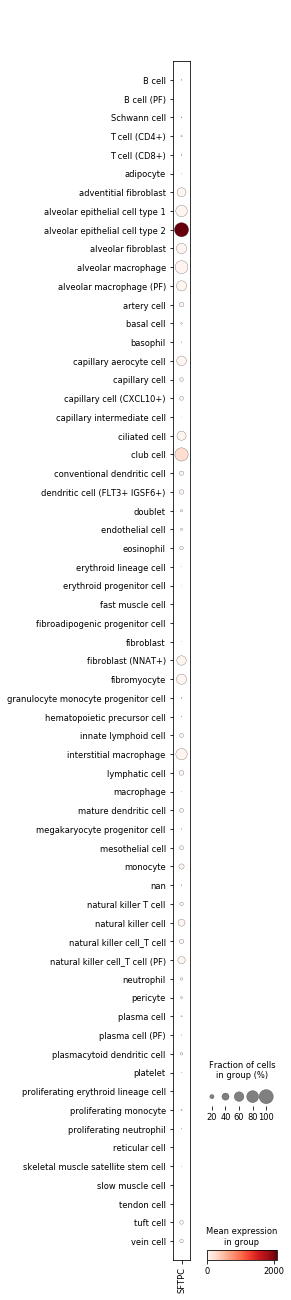

In [24]:
scanpy.pl.dotplot(lemur_tenx_new_obs, var_names=['SFTPC'], groupby='narrow_group')

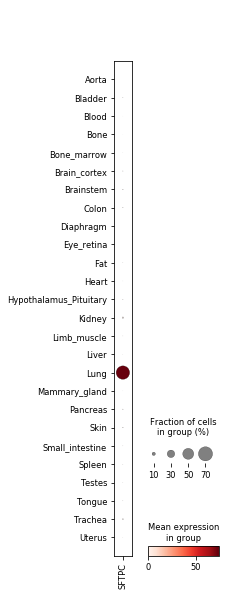

In [25]:
scanpy.pl.dotplot(lemur_tenx_new_obs, var_names=['SFTPC'], groupby='tissue')

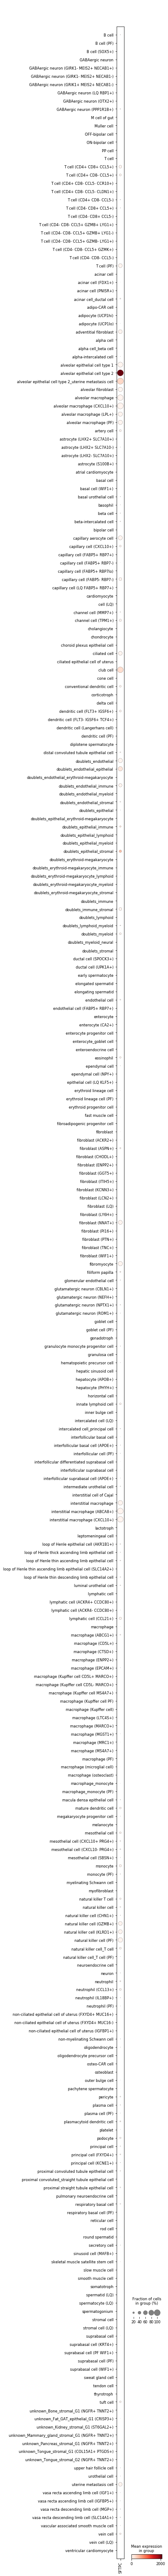

In [26]:
scanpy.pl.dotplot(lemur_tenx_new_obs, var_names=['SFTPC'], groupby='free_annotation')

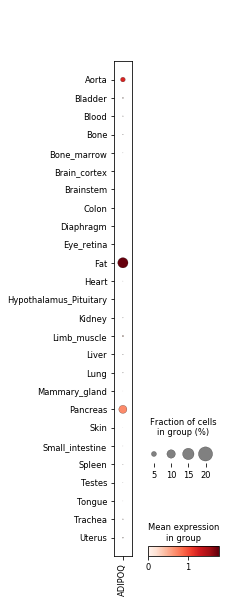

In [27]:
scanpy.pl.dotplot(lemur_tenx_new_obs, var_names=['ADIPOQ'], groupby='tissue')

### Add "species" column to observations

In [28]:
lemur_tenx_new_obs.obs['species'] = 'Mouse Lemur'
lemur_tenx_new_obs.obs['species_latin'] = 'Microcebus murinus'
lemur_tenx_new_obs.obs.head()

,n_counts,n_genes,cell_barcode,sequencing_run,channel_10x,individual,tissue,subtissue,compartment,cell_ontology_class,free_annotation,narrow_group,broad_group,compartment_group,method,species,species_latin
L4_Testes_10X_AAACCTGAGGTAAACT,18538,4310,AAACCTGAGGTAAACT,180917_A00111_0212_BHGMF5DMXX,L4_Testes_10X,L4,Testes,nan,germ,spermatocyte,pachytene spermatocyte,nan,nan,nan,10x,Mouse Lemur,Microcebus murinus
L4_Testes_10X_AAACCTGAGTACGTAA,35949,4131,AAACCTGAGTACGTAA,180917_A00111_0212_BHGMF5DMXX,L4_Testes_10X,L4,Testes,nan,germ,spermatid,round spermatid,nan,nan,nan,10x,Mouse Lemur,Microcebus murinus
L4_Testes_10X_AAACCTGCAGTATGCT,17119,4054,AAACCTGCAGTATGCT,180917_A00111_0212_BHGMF5DMXX,L4_Testes_10X,L4,Testes,nan,germ,spermatocyte,pachytene spermatocyte,nan,nan,nan,10x,Mouse Lemur,Microcebus murinus
L4_Testes_10X_AAACCTGGTATAATGG,20283,4261,AAACCTGGTATAATGG,180917_A00111_0212_BHGMF5DMXX,L4_Testes_10X,L4,Testes,nan,germ,spermatocyte,pachytene spermatocyte,nan,nan,nan,10x,Mouse Lemur,Microcebus murinus
L4_Testes_10X_AAACCTGGTGCCTGTG,49744,6391,AAACCTGGTGCCTGTG,180917_A00111_0212_BHGMF5DMXX,L4_Testes_10X,L4,Testes,nan,germ,spermatocyte,pachytene spermatocyte,nan,nan,nan,10x,Mouse Lemur,Microcebus murinus


# Write to file

In [29]:
h5ad = os.path.join(data_folder, "LCA_10x_update_minimal_obs_muscle_update_july2021.h5ad")
lemur_tenx_new_obs.write(h5ad) 

... storing 'species' as categorical
... storing 'species_latin' as categorical


In [30]:
lemur_tenx_new_obs.obs.individual.value_counts()

L4    96842
L2    83716
L3    30753
L1    20441
Name: individual, dtype: int64

In [31]:
lemur_tenx_new_obs.obs.head()

,n_counts,n_genes,cell_barcode,sequencing_run,channel_10x,individual,tissue,subtissue,compartment,cell_ontology_class,free_annotation,narrow_group,broad_group,compartment_group,method,species,species_latin
L4_Testes_10X_AAACCTGAGGTAAACT,18538,4310,AAACCTGAGGTAAACT,180917_A00111_0212_BHGMF5DMXX,L4_Testes_10X,L4,Testes,nan,germ,spermatocyte,pachytene spermatocyte,nan,nan,nan,10x,Mouse Lemur,Microcebus murinus
L4_Testes_10X_AAACCTGAGTACGTAA,35949,4131,AAACCTGAGTACGTAA,180917_A00111_0212_BHGMF5DMXX,L4_Testes_10X,L4,Testes,nan,germ,spermatid,round spermatid,nan,nan,nan,10x,Mouse Lemur,Microcebus murinus
L4_Testes_10X_AAACCTGCAGTATGCT,17119,4054,AAACCTGCAGTATGCT,180917_A00111_0212_BHGMF5DMXX,L4_Testes_10X,L4,Testes,nan,germ,spermatocyte,pachytene spermatocyte,nan,nan,nan,10x,Mouse Lemur,Microcebus murinus
L4_Testes_10X_AAACCTGGTATAATGG,20283,4261,AAACCTGGTATAATGG,180917_A00111_0212_BHGMF5DMXX,L4_Testes_10X,L4,Testes,nan,germ,spermatocyte,pachytene spermatocyte,nan,nan,nan,10x,Mouse Lemur,Microcebus murinus
L4_Testes_10X_AAACCTGGTGCCTGTG,49744,6391,AAACCTGGTGCCTGTG,180917_A00111_0212_BHGMF5DMXX,L4_Testes_10X,L4,Testes,nan,germ,spermatocyte,pachytene spermatocyte,nan,nan,nan,10x,Mouse Lemur,Microcebus murinus


In [32]:
h5ad

'/home/olga/data_lg/data_sm_copy/tabula-microcebus/data-objects/ss2-10x-combined/LCA_10x_update_minimal_obs_muscle_update_july2021.h5ad'

In [33]:
def check_celltype_presence(adata, celltypes=('slow muscle cell', 'fast muscle cell'), celltype_col='narrow_group'):
    for celltype in celltypes:
        assert celltype in set(adata.obs[celltype_col])

check_celltype_presence(lemur_tenx_new_obs)

# Subset to 1:1 orthologs

## Read orthologs

In [34]:
csv = os.path.join(
    "/home/olga/googledrive/TabulaMicrocebus/data/orthologous-genes",
    "ncbi_mgi_ensembl__mouse-lemur_human_mouse__orthologs__gene_names__one2one.csv",
)

gene_orthologies = pd.read_csv(csv, index_col=0)
print(gene_orthologies)
gene_orthologies.head()

      mouse_lemur__gene_name human__gene_name mouse__gene_name
0                      ADAT3            ADAT3            Adat3
1                       CDK7             CDK7             Cdk7
2                       CNMD             CNMD             Cnmd
3                   TMEM229B         TMEM229B         Tmem229b
4                       DIO2             DIO2             Dio2
...                      ...              ...              ...
15509                SPINK14          SPINK14          Spink14
15510                 PARD6B           PARD6B           Pard6b
15511                 CACYBP           CACYBP           Cacybp
15512                 SLC1A4           SLC1A4           Slc1a4
15513                  ABCG1            ABCG1            Abcg1

[15514 rows x 3 columns]


,mouse_lemur__gene_name,human__gene_name,mouse__gene_name
0,ADAT3,ADAT3,Adat3
1,CDK7,CDK7,Cdk7
2,CNMD,CNMD,Cnmd
3,TMEM229B,TMEM229B,Tmem229b
4,DIO2,DIO2,Dio2


## Prepare for concatenation and 1:1 orthologs

### Filter for only 1:1 orthologs

In [35]:
gene_mask = lemur_tenx_new_obs.var.index.isin(gene_orthologies['mouse_lemur__gene_name'].values)
print(gene_mask.sum())
lemur_tenx_new_obs_one2one = lemur_tenx_new_obs[:, gene_mask]
lemur_tenx_new_obs_one2one

15102


View of AnnData object with n_obs × n_vars = 231752 × 15102
    obs: 'n_counts', 'n_genes', 'cell_barcode', 'sequencing_run', 'channel_10x', 'individual', 'tissue', 'subtissue', 'compartment', 'cell_ontology_class', 'free_annotation', 'narrow_group', 'broad_group', 'compartment_group', 'method', 'species', 'species_latin'
    var: 'name', 'highly_variable'
    uns: 'compartment_update_colors'
    obsm: 'X_pca', 'X_umap'
    layers: 'X_disp', 'raw_counts'

In [36]:
lemur_tenx_new_obs_one2one.obs.head()

,n_counts,n_genes,cell_barcode,sequencing_run,channel_10x,individual,tissue,subtissue,compartment,cell_ontology_class,free_annotation,narrow_group,broad_group,compartment_group,method,species,species_latin
L4_Testes_10X_AAACCTGAGGTAAACT,18538,4310,AAACCTGAGGTAAACT,180917_A00111_0212_BHGMF5DMXX,L4_Testes_10X,L4,Testes,nan,germ,spermatocyte,pachytene spermatocyte,nan,nan,nan,10x,Mouse Lemur,Microcebus murinus
L4_Testes_10X_AAACCTGAGTACGTAA,35949,4131,AAACCTGAGTACGTAA,180917_A00111_0212_BHGMF5DMXX,L4_Testes_10X,L4,Testes,nan,germ,spermatid,round spermatid,nan,nan,nan,10x,Mouse Lemur,Microcebus murinus
L4_Testes_10X_AAACCTGCAGTATGCT,17119,4054,AAACCTGCAGTATGCT,180917_A00111_0212_BHGMF5DMXX,L4_Testes_10X,L4,Testes,nan,germ,spermatocyte,pachytene spermatocyte,nan,nan,nan,10x,Mouse Lemur,Microcebus murinus
L4_Testes_10X_AAACCTGGTATAATGG,20283,4261,AAACCTGGTATAATGG,180917_A00111_0212_BHGMF5DMXX,L4_Testes_10X,L4,Testes,nan,germ,spermatocyte,pachytene spermatocyte,nan,nan,nan,10x,Mouse Lemur,Microcebus murinus
L4_Testes_10X_AAACCTGGTGCCTGTG,49744,6391,AAACCTGGTGCCTGTG,180917_A00111_0212_BHGMF5DMXX,L4_Testes_10X,L4,Testes,nan,germ,spermatocyte,pachytene spermatocyte,nan,nan,nan,10x,Mouse Lemur,Microcebus murinus


In [37]:
lemur_tenx_new_obs_one2one.obs.query("method == '10x'")

,n_counts,n_genes,cell_barcode,sequencing_run,channel_10x,individual,tissue,subtissue,compartment,cell_ontology_class,free_annotation,narrow_group,broad_group,compartment_group,method,species,species_latin
L4_Testes_10X_AAACCTGAGGTAAACT,18538,4310,AAACCTGAGGTAAACT,180917_A00111_0212_BHGMF5DMXX,L4_Testes_10X,L4,Testes,nan,germ,spermatocyte,pachytene spermatocyte,nan,nan,nan,10x,Mouse Lemur,Microcebus murinus
L4_Testes_10X_AAACCTGAGTACGTAA,35949,4131,AAACCTGAGTACGTAA,180917_A00111_0212_BHGMF5DMXX,L4_Testes_10X,L4,Testes,nan,germ,spermatid,round spermatid,nan,nan,nan,10x,Mouse Lemur,Microcebus murinus
L4_Testes_10X_AAACCTGCAGTATGCT,17119,4054,AAACCTGCAGTATGCT,180917_A00111_0212_BHGMF5DMXX,L4_Testes_10X,L4,Testes,nan,germ,spermatocyte,pachytene spermatocyte,nan,nan,nan,10x,Mouse Lemur,Microcebus murinus
L4_Testes_10X_AAACCTGGTATAATGG,20283,4261,AAACCTGGTATAATGG,180917_A00111_0212_BHGMF5DMXX,L4_Testes_10X,L4,Testes,nan,germ,spermatocyte,pachytene spermatocyte,nan,nan,nan,10x,Mouse Lemur,Microcebus murinus
L4_Testes_10X_AAACCTGGTGCCTGTG,49744,6391,AAACCTGGTGCCTGTG,180917_A00111_0212_BHGMF5DMXX,L4_Testes_10X,L4,Testes,nan,germ,spermatocyte,pachytene spermatocyte,nan,nan,nan,10x,Mouse Lemur,Microcebus murinus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
L2_Blood_10X_TTTGTCAGTAACGCGA,2389,770,TTTGTCAGTAACGCGA,171001_A00111_0071_BH3TTFDMXX,L2_Blood_10X,L2,Blood,nan,myeloid,neutrophil,neutrophil,neutrophil,neutrophil,myeloid,10x,Mouse Lemur,Microcebus murinus
L2_Blood_10X_TTTGTCAGTCACAAGG,4704,1620,TTTGTCAGTCACAAGG,171001_A00111_0071_BH3TTFDMXX,L2_Blood_10X,L2,Blood,nan,myeloid,monocyte,monocyte,monocyte,monocyte,myeloid,10x,Mouse Lemur,Microcebus murinus
L2_Blood_10X_TTTGTCAGTTGTCGCG,5270,1171,TTTGTCAGTTGTCGCG,171001_A00111_0071_BH3TTFDMXX,L2_Blood_10X,L2,Blood,nan,myeloid,neutrophil,neutrophil,neutrophil,neutrophil,myeloid,10x,Mouse Lemur,Microcebus murinus
L2_Blood_10X_TTTGTCATCAATAAGG,8774,1604,TTTGTCATCAATAAGG,171001_A00111_0071_BH3TTFDMXX,L2_Blood_10X,L2,Blood,nan,myeloid,neutrophil,neutrophil,neutrophil,neutrophil,myeloid,10x,Mouse Lemur,Microcebus murinus


In [38]:
scanpy.pp.calculate_qc_metrics(lemur_tenx_new_obs_one2one)

(                                n_genes_by_counts  log1p_n_genes_by_counts  \
 L4_Testes_10X_AAACCTGAGGTAAACT               3192                 8.068716   
 L4_Testes_10X_AAACCTGAGTACGTAA               2838                 7.951207   
 L4_Testes_10X_AAACCTGCAGTATGCT               3072                 8.030410   
 L4_Testes_10X_AAACCTGGTATAATGG               2991                 8.003697   
 L4_Testes_10X_AAACCTGGTGCCTGTG               4374                 8.383662   
 ...                                           ...                      ...   
 L2_Blood_10X_TTTGTCAGTAACGCGA                 636                 6.456770   
 L2_Blood_10X_TTTGTCAGTCACAAGG                1315                 7.182352   
 L2_Blood_10X_TTTGTCAGTTGTCGCG                 918                 6.823286   
 L2_Blood_10X_TTTGTCATCAATAAGG                1285                 7.159292   
 L2_Blood_10X_TTTGTCATCAGGTAAA                 890                 6.792344   
 
                                 total_counts  log

In [39]:
lemur_tenx_new_obs_one2one

View of AnnData object with n_obs × n_vars = 231752 × 15102
    obs: 'n_counts', 'n_genes', 'cell_barcode', 'sequencing_run', 'channel_10x', 'individual', 'tissue', 'subtissue', 'compartment', 'cell_ontology_class', 'free_annotation', 'narrow_group', 'broad_group', 'compartment_group', 'method', 'species', 'species_latin'
    var: 'name', 'highly_variable'
    uns: 'compartment_update_colors'
    obsm: 'X_pca', 'X_umap'
    layers: 'X_disp', 'raw_counts'

In [40]:
lemur_tenx_new_obs_one2one.var.head()

,name,highly_variable
RBP2,RBP2,False
COPB2,COPB2,True
MRPS22,MRPS22,False
FOXL2,FOXL2,False
PIK3CB,PIK3CB,False


### Double-check SFTPC

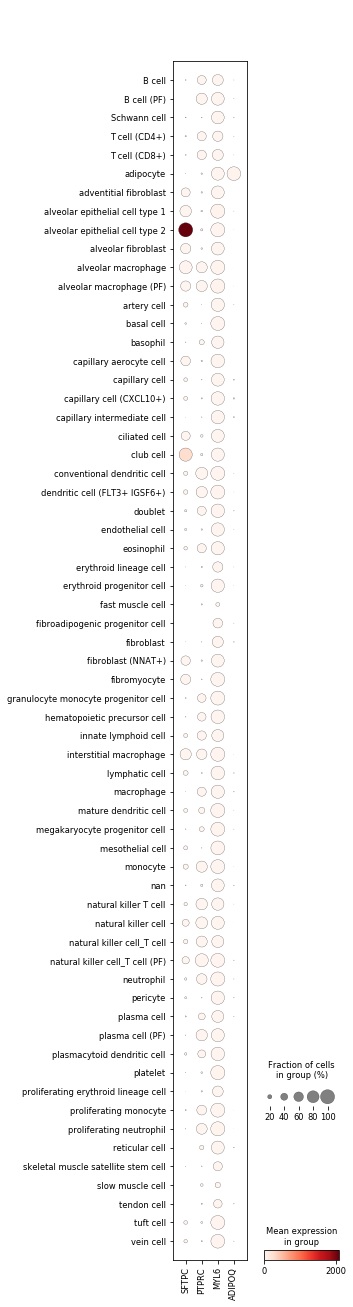

In [41]:
scanpy.pl.dotplot(lemur_tenx_new_obs_one2one, var_names=['SFTPC', 'PTPRC', 'MYL6', 'ADIPOQ'], groupby='narrow_group')

In [42]:
lemur_tenx_new_obs_one2one.var.head()

,name,highly_variable
RBP2,RBP2,False
COPB2,COPB2,True
MRPS22,MRPS22,False
FOXL2,FOXL2,False
PIK3CB,PIK3CB,False


### Use human gene names

In [43]:
lemur_tenx_new_obs_one2one_new_var = lemur_tenx_new_obs_one2one.var.merge(gene_orthologies, left_index=True, right_on='mouse_lemur__gene_name')
print(lemur_tenx_new_obs_one2one_new_var.shape)
lemur_tenx_new_obs_one2one_new_var.head()

(15102, 5)


,name,highly_variable,mouse_lemur__gene_name,human__gene_name,mouse__gene_name
14398,RBP2,False,RBP2,RBP2,Rbp2
9279,COPB2,True,COPB2,COPB2,Copb2
12950,MRPS22,False,MRPS22,MRPS22,Mrps22
6146,FOXL2,False,FOXL2,FOXL2,Foxl2
11865,PIK3CB,False,PIK3CB,PIK3CB,Pik3cb


In [44]:
lemur_tenx_new_obs_one2one.var = lemur_tenx_new_obs_one2one_new_var.set_index('human__gene_name')
lemur_tenx_new_obs_one2one.var.head()

,name,highly_variable,mouse_lemur__gene_name,mouse__gene_name
human__gene_name,,,,
RBP2,RBP2,False,RBP2,Rbp2
COPB2,COPB2,True,COPB2,Copb2
MRPS22,MRPS22,False,MRPS22,Mrps22
FOXL2,FOXL2,False,FOXL2,Foxl2
PIK3CB,PIK3CB,False,PIK3CB,Pik3cb


## Write whole object to file

In [45]:
outdir_gdrive = "/home/olga/googledrive/TabulaMicrocebus/data/cross-species"
outdir_local = "/home/olga/data_lg/data_sm_copy/tabula-microcebus/data-objects/cross-species"
outdirs = outdir_gdrive, outdir_local

In [46]:
for d in outdirs:
    h5ad = f"{d}/alltissues__10x__lemur__one2one_orthologs__july2021.h5ad"
    %time lemur_tenx_new_obs_one2one.write(h5ad)


CPU times: user 5.95 s, sys: 8.14 s, total: 14.1 s
Wall time: 6min 48s
CPU times: user 2.56 s, sys: 5.62 s, total: 8.18 s
Wall time: 17.1 s


In [47]:
lemur_tenx_new_obs_one2one.obs.head()

,n_counts,n_genes,cell_barcode,sequencing_run,channel_10x,individual,tissue,subtissue,compartment,cell_ontology_class,free_annotation,narrow_group,broad_group,compartment_group,method,species,species_latin
L4_Testes_10X_AAACCTGAGGTAAACT,18538,4310,AAACCTGAGGTAAACT,180917_A00111_0212_BHGMF5DMXX,L4_Testes_10X,L4,Testes,nan,germ,spermatocyte,pachytene spermatocyte,nan,nan,nan,10x,Mouse Lemur,Microcebus murinus
L4_Testes_10X_AAACCTGAGTACGTAA,35949,4131,AAACCTGAGTACGTAA,180917_A00111_0212_BHGMF5DMXX,L4_Testes_10X,L4,Testes,nan,germ,spermatid,round spermatid,nan,nan,nan,10x,Mouse Lemur,Microcebus murinus
L4_Testes_10X_AAACCTGCAGTATGCT,17119,4054,AAACCTGCAGTATGCT,180917_A00111_0212_BHGMF5DMXX,L4_Testes_10X,L4,Testes,nan,germ,spermatocyte,pachytene spermatocyte,nan,nan,nan,10x,Mouse Lemur,Microcebus murinus
L4_Testes_10X_AAACCTGGTATAATGG,20283,4261,AAACCTGGTATAATGG,180917_A00111_0212_BHGMF5DMXX,L4_Testes_10X,L4,Testes,nan,germ,spermatocyte,pachytene spermatocyte,nan,nan,nan,10x,Mouse Lemur,Microcebus murinus
L4_Testes_10X_AAACCTGGTGCCTGTG,49744,6391,AAACCTGGTGCCTGTG,180917_A00111_0212_BHGMF5DMXX,L4_Testes_10X,L4,Testes,nan,germ,spermatocyte,pachytene spermatocyte,nan,nan,nan,10x,Mouse Lemur,Microcebus murinus
